In [2]:
from aestheval.data.datasets import AVADataset
import torch
from tqdm import tqdm
SPLITS = ('train', 'val', 'test')

ava_dataset = [AVADataset(split, comments_path= "../data/ava", load_images=False) for split in SPLITS]

In [3]:
dataset = torch.utils.data.ConcatDataset(ava_dataset)

In [16]:
ncomments=[]
nwords = []
for im, d in dataset:
    # print(d['comments'])
    ncomments.append(len(d['comments']))
    nwords.extend([len(x.split()) for x in d['comments']])

In [18]:
len(dataset)

253961

In [17]:
import statistics as st
st.mean(ncomments)

14.182339020558274

In [19]:
st.mean(nwords)

14.621696442379159

In [3]:
gt_scores, pred_scores = zip(*[(data['im_score'], data['mean_score']) for _, data in tqdm(dataset)])



100%|██████████| 253961/253961 [00:00<00:00, 1482493.87it/s]


In [4]:
from scipy import stats
import sklearn.metrics as sm

pred_scores = [score*10 for score in pred_scores]
srcc = stats.spearmanr(gt_scores, pred_scores)
print("SRCC =", srcc)
mse = round(sm.mean_squared_error(gt_scores, pred_scores), 4)
print("MSE =", mse)
lcc = stats.pearsonr(gt_scores, pred_scores)
print("LCC =", lcc)

SRCC = SpearmanrResult(correlation=0.6418159938404643, pvalue=0.0)
MSE = 5.9397
LCC = (0.6424464694494703, 0.0)


In [5]:
import pandas as pd
df = pd.DataFrame({
    "Ground truth": gt_scores,
    "Predicted score": pred_scores
    })
df

,Ground truth,Predicted score
0,6.112903,7.937589
1,6.593750,8.828905
2,5.796875,9.539987
3,5.040984,9.905155
4,5.943548,9.696896
...,...,...
253956,4.439024,4.308670
253957,5.814050,7.860226
253958,5.344398,7.022425
253959,5.893701,9.159501


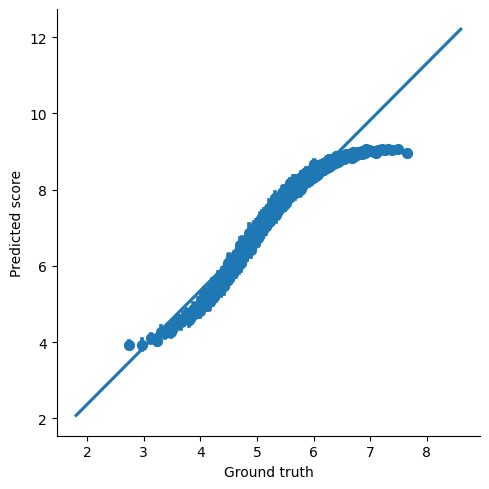

In [7]:
import seaborn as sns
ax = sns.lmplot(x="Ground truth", y="Predicted score", data=df, x_bins=1000)
